# <p style="text-align: center;">Direct solver comparison in OGS</p>

## Machine: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz

## Model: ThermoHydroMechanics point heat source bechnmark, quadratic elements (2D) 10 time steps

In [5]:
from ogs6py.ogs import OGS
import numpy as np
import matplotlib.pyplot as plt
import plot_settings

In [6]:
runs = 10

In [7]:
solvers = ["Eigen/SparseLU","Eigen/PardisoLU", "Eigen/BiCGSTAB"]

In [8]:
executables = {"gcc":"/home/buchwalj/github/ogs/build_mkl_eigengcc/bin", "clang":"/home/buchwalj/github/ogs/build_mkl_eigen/bin"}

In [26]:
def setSolver(fileobject, solver, compiler):
    if solver == "Eigen/SparseLU":
        fileobject.replace_text("SparseLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("1", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"sparselu_{compiler}.out", wrapper="source /opt/intel/oneapi/setvars.sh intel64 &&")
        exec_time = fileobject.exec_time
    elif solver == "Eigen/PardisoLU":
        fileobject.replace_text("PardisoLU", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("0", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"pardisolu_{compiler}.out", wrapper="source /opt/intel/oneapi/setvars.sh intel64 &&")
    elif solver == "Eigen/BiCGSTAB":
        fileobject.replace_text("BiCGSTAB", xpath="./linear_solvers/linear_solver/eigen/solver_type")
        fileobject.replace_text("1", xpath="./linear_solvers/linear_solver/eigen/scaling")
        fileobject.write_input()
        fileobject.run_model(path=executables[compiler], logfile=f"bicgstab_{compiler}.out", wrapper="source /opt/intel/oneapi/setvars.sh intel64 &&")
    exec_time = fileobject.exec_time
    return exec_time

In [27]:
exec_time = {}
for compiler in executables:
    exec_time[compiler] = {}
for solver in solvers:
    for compiler in executables:
        exec_time[compiler][solver] = []
    for i in range(runs):
        for compiler in executables:
            solver_ = solver.split("/")[-1]
            m = OGS(INPUT_FILE="pointheatsource_quadratic-mesh.prj", PROJECT_FILE=f"{solver_}.prj")
            exec_time[compiler][solver].append(setSolver(m, solver,compiler))

OGS finished with project file SparseLU.prj.
Execution took 9.100319385528564 s
OGS finished with project file SparseLU.prj.
Execution took 9.965462684631348 s
OGS finished with project file SparseLU.prj.
Execution took 9.193060398101807 s
OGS finished with project file SparseLU.prj.
Execution took 10.187584638595581 s
OGS finished with project file SparseLU.prj.
Execution took 9.524612188339233 s
OGS finished with project file SparseLU.prj.
Execution took 10.187516927719116 s
OGS finished with project file SparseLU.prj.
Execution took 9.919373273849487 s
OGS finished with project file SparseLU.prj.
Execution took 10.30151629447937 s
OGS finished with project file SparseLU.prj.
Execution took 10.17797589302063 s
OGS finished with project file SparseLU.prj.
Execution took 10.299076795578003 s
OGS finished with project file SparseLU.prj.
Execution took 10.039325952529907 s
OGS finished with project file SparseLU.prj.
Execution took 10.549376726150513 s
OGS finished with project file Spar

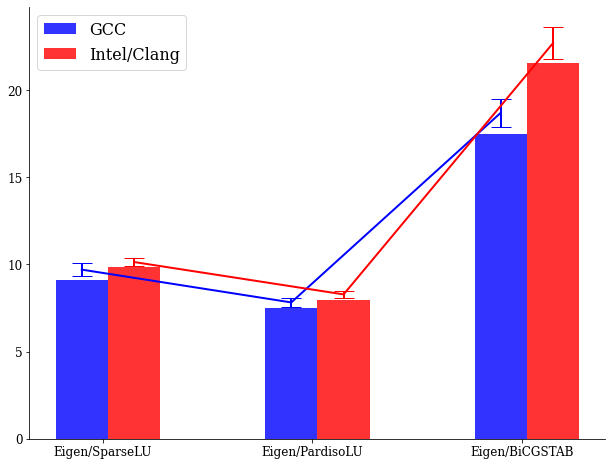

In [42]:
fig = plt.figure()
plt.rcParams.update({'font.size': 12})
ax = fig.add_axes([0,0,1,1])
slvrs_x = np.arange(len(solvers))
ax.bar(slvrs_x,[np.min(exec_time["gcc"][solver]) for solver in solvers], color='b', alpha=0.8, width=0.25,label="GCC")
ax.bar(slvrs_x+0.25,[np.min(exec_time["clang"][solver]) for solver in solvers], color='r', alpha=0.8,width=0.25, label="Intel/Clang")
plt.errorbar(slvrs_x, [np.mean(exec_time["gcc"][solver]) for solver in solvers], yerr=[np.std(exec_time["gcc"][solver]) for solver in solvers], color="blue", capsize=10)
plt.errorbar(slvrs_x+0.25, [np.mean(exec_time["clang"][solver]) for solver in solvers], yerr=[np.std(exec_time["clang"][solver]) for solver in solvers], color="red", capsize=10)
plt.xticks([r+0.1 for r in range(len(solvers))], solvers)
plt.legend()
plt.show()

In [14]:
[np.sum(exec_time[solver])/runs for solver in solvers]

[49.63165981769562,
 11.968478202819824,
 9.88496000766754,
 8.763875651359559,
 7.185970163345337]